# Задание:



1.   Используйте метод K-средних и метод DBSCAN на самостоятельно сгенерированной выборке с количеством кластеров не менее 4. Для увеличения числа кластеров при генерации можно задать количество центров в функции make_blobs через параметр centers.
2.   Используйте эти же два метода на датасете [Mall_Customers](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).
3.   Для каждого метода необходимо построить график.


<h1> Лабораторная 1 </h1>

*Подключение библиотек и google drive*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

downloader = drive.CreateFile({'id':'1EkZP-BGS3XMvFtzriMydX3zOUTK0I7Ik'})


# 1. Генерируем выборку с кластерами 

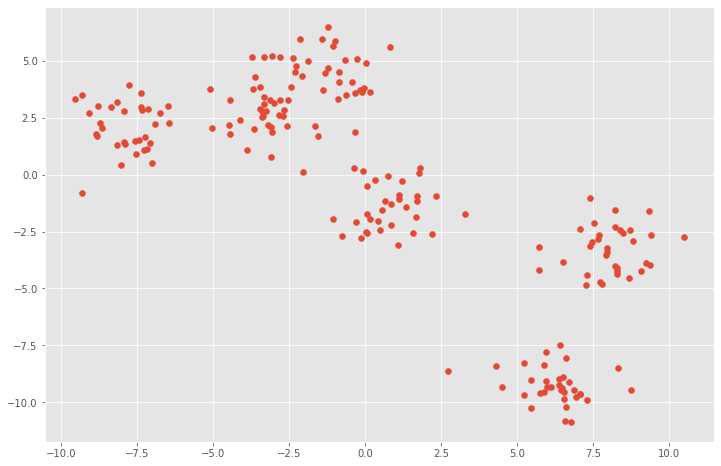

In [ ]:
firstX, firstY = make_blobs(n_samples=200, centers=6, random_state=6)
plt.scatter(firstX[:,0], firstX[:,1])


<h3> Применим метод логтя </h3>
Да, в данном случае он не нужен, т.к. мы изначально знааем кол-во кластеров. Но для примера покажу:

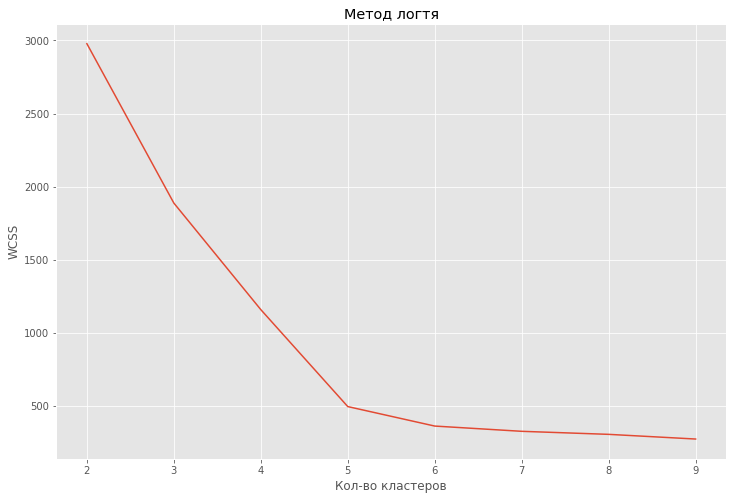

In [ ]:
firstCriteries = []
for k in range(2,10):
  firstKmeansMode=KMeans(n_clusters=k, init = 'k-means++', random_state=3)
  firstKmeansMode.fit(firstX)
  firstCriteries.append(firstKmeansMode.inertia_)

plt.plot(range(2,10), firstCriteries)
plt.title('Метод логтя')
plt.xlabel('Кол-во кластеров')
plt.ylabel('WCSS')
plt.show()


Видим что кластеров примерно 5-6

<h3> K-means</h3>

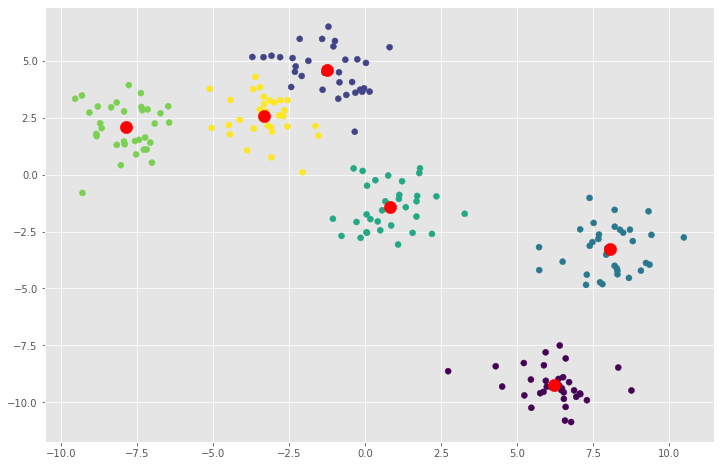

In [ ]:
firstKmeansModel = KMeans(n_clusters=6)
firstKmeansModel.fit(firstX)
fistLabels = firstKmeansModel.labels_
plt.scatter(firstX[:,0], firstX[:,1], c=fistLabels)
plt.scatter(firstKmeansModel.cluster_centers_[:, 0], firstKmeansModel.cluster_centers_[:, 1], s = 150, c = 'red', label = 'Centroids')

DBSCAN

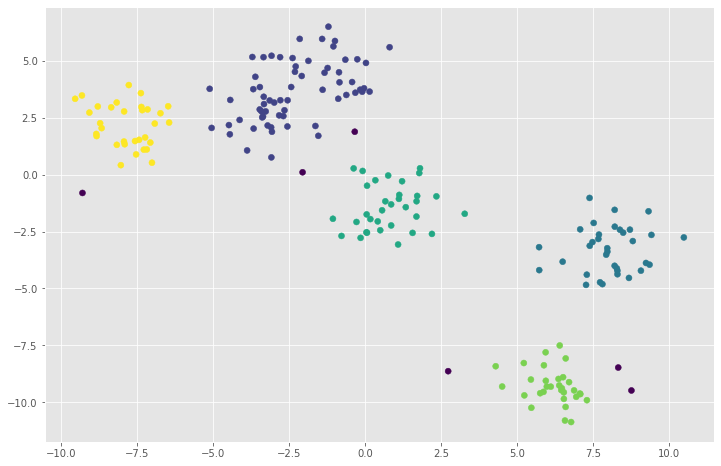

In [ ]:
firstClustering = DBSCAN(eps=1.3, min_samples=5).fit_predict(firstX)
plt.scatter(firstX[:,0], firstX[:,1], c=firstClustering);

Опытным путем находить значение 1.3 для расстояния между данными

Видим, что DBSCAN выделяет крайние точки как отдельные кластеры

# 2. Используем данный датасет

In [ ]:
downloader.GetContentFile('Mall_Customers.csv')

dataset = pd.read_csv('Mall_Customers.csv')
secondX = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values

Подбор количества кластеров методом логтя

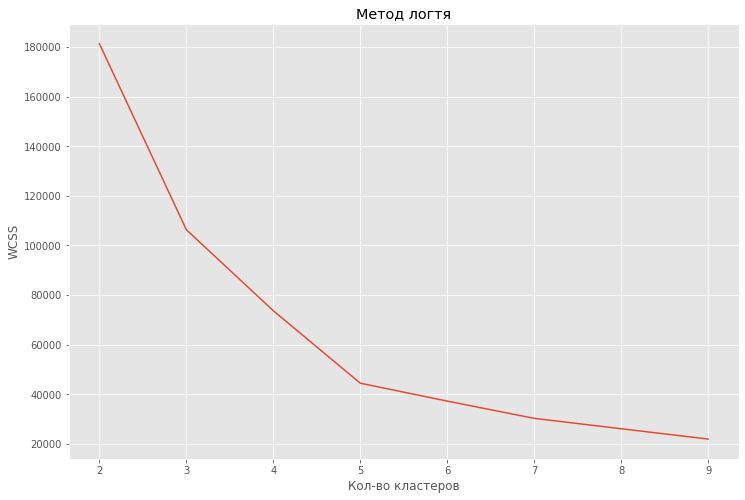

In [ ]:
criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, init = 'k-means++', random_state=3)
  kmeansModel.fit(secondX)
  criteries.append(kmeansModel.inertia_)

plt.plot(range(2,10), criteries)
plt.title('Метод логтя')
plt.xlabel('Кол-во кластеров')
plt.ylabel('WCSS')
plt.show()

Обучение k-means и вывод кластеров

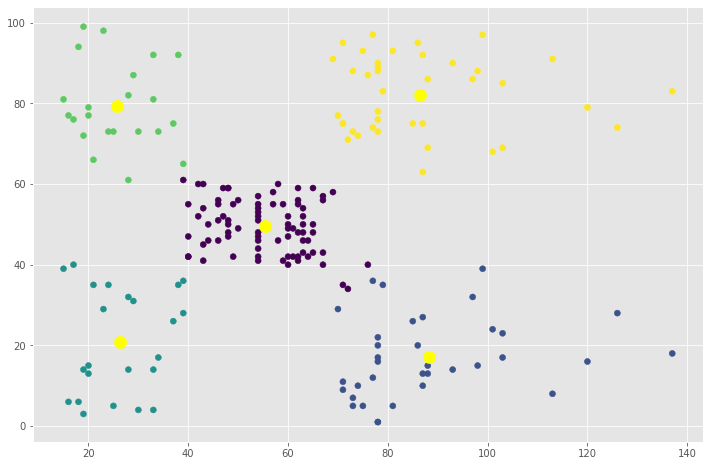

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(secondX)
labels = kmeans.labels_

plt.scatter(secondX[:,0], secondX[:,1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')

Обучение DBSCAN и вывод кластеров


[-1  0  1  2  3  4  5  6]
8 - Количество кластеров у DBSCAN


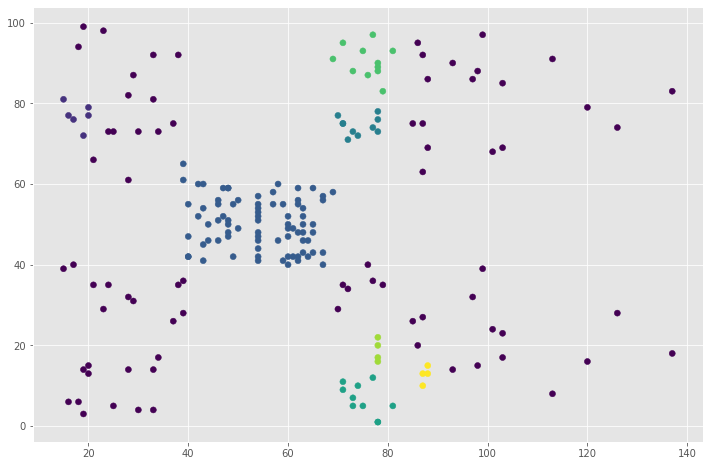

In [ ]:
dbscan = DBSCAN(eps=5, min_samples=4)
model = dbscan.fit(secondX)

labels = model.labels_
print(np.unique(labels))
print(str(len(np.unique(labels))) + " - Количество кластеров у DBSCAN")
plt.scatter(secondX[:,0], secondX[:,1], c=labels);
